# Basic Set-up

In [6]:
Dir_Main = r"D:\GitHub Desktop\AAE625_25\Week_1"

# Import the Household Incme data

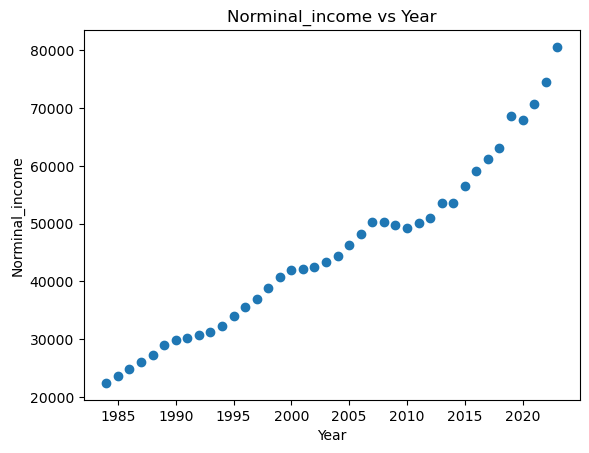

,Date,Norminal_income,Year
0,1984-01-01,22420,1984
1,1985-01-01,23620,1985
2,1986-01-01,24900,1986
3,1987-01-01,26060,1987
4,1988-01-01,27230,1988


In [7]:
# Import the MEHOINUSA646N.csv in the Dir_Main:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(Dir_Main)
df_income = pd.read_csv(Dir_Main + r"\MEHOINUSA646N.csv")
# change column names: observation_date: Date, HOINUSA646N: Norminal_income
df_income.columns = ['Date', 'Norminal_income']
# change the Data to datetime type
df_income['Date'] = pd.to_datetime(df_income['Date'])
df_income['Year'] = df_income['Date'].dt.year
# create scatter plot: x-axis: Date; y-axis: Norminal_income
plt.scatter(df_income['Date'], df_income['Norminal_income'])
plt.xlabel('Year')
plt.ylabel('Norminal_income')
plt.title('Norminal_income vs Year')
plt.show()

df_income.head()

# Import the CPI data

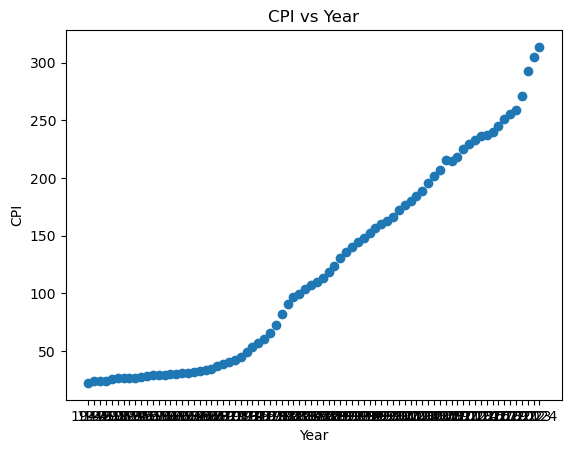

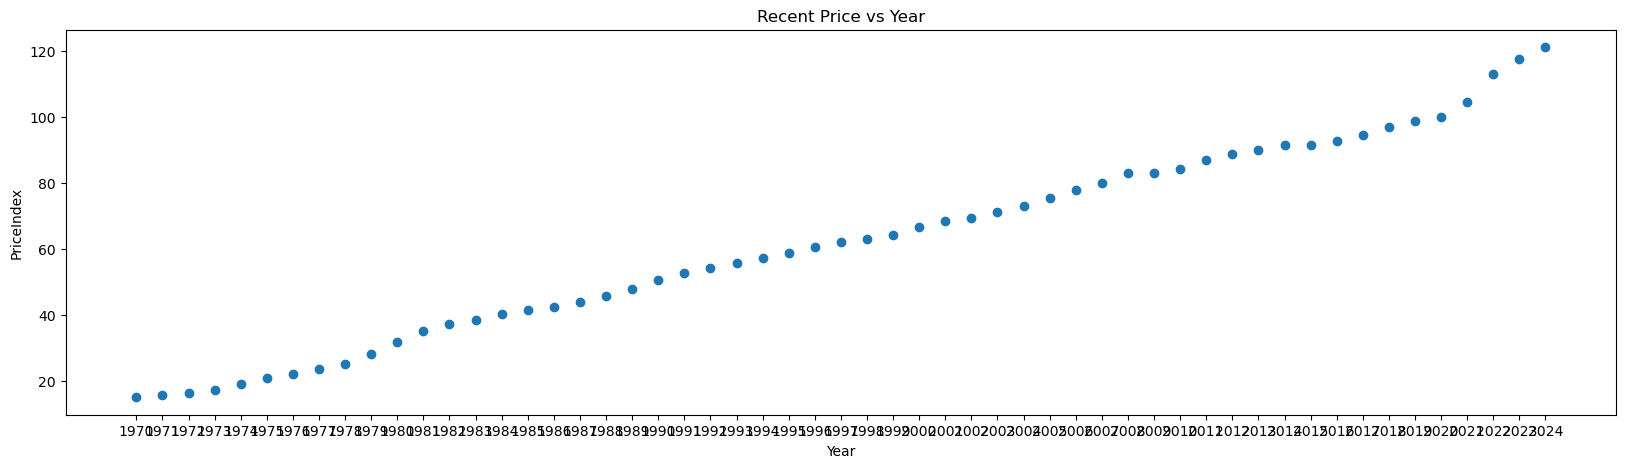

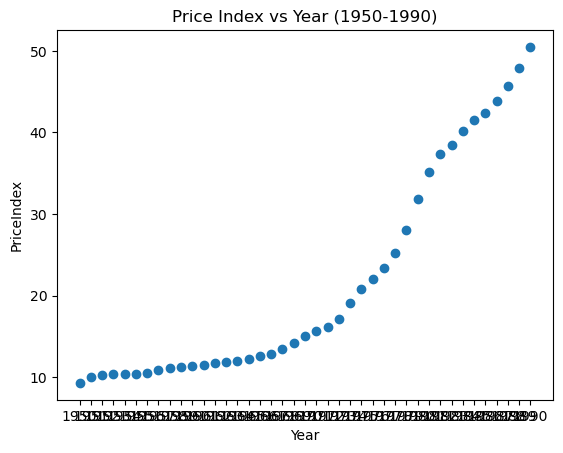

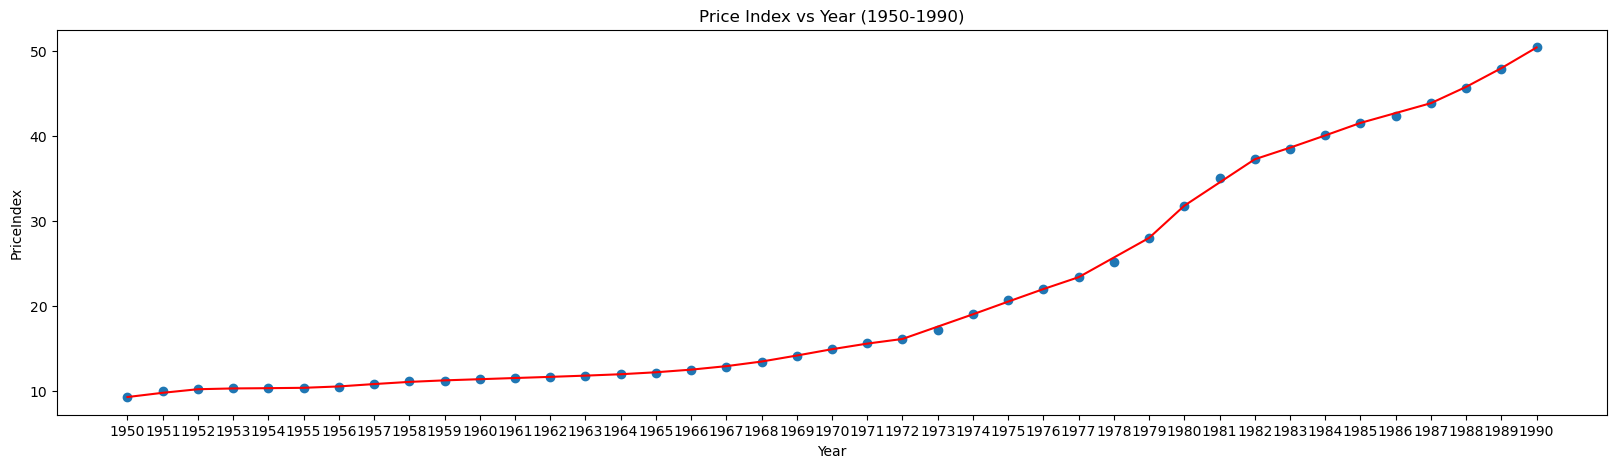

In [8]:
# cpi data saved in the Dir_Main folder, named cpi_annual.csv
df_cpi = pd.read_csv(Dir_Main + r"\cpi_annual.csv")
# chaneg column names: observation_date: Date, cpi: CPI
df_cpi.columns = ['Date', 'CPI']
df_cpi.head()
df_cpi['Year'] = df_cpi['Date'].str[:4]

# create a scatter plot: x-axis: Date; y-axis: CPI
plt.scatter(df_cpi['Year'], df_cpi['CPI'])
plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI vs Year')
plt.show()

# create the 'CPI_base2020' column in df_cpi:
# the value in the column is the CPI value in 2020:
# CPI_base2020 = CPI in 2020
df_cpi['CPI_base2020'] = df_cpi['CPI'][df_cpi['Year'] == '2020'].values[0]

#create the 'PriceIndex' Column in df_cpi:
df_cpi['PriceIndex'] = df_cpi['CPI'] / df_cpi['CPI_base2020']*100
df_cpi.head()

# change the size of the figure. It should be wider:
plt.figure(figsize=(20, 5))
df_cpi_recent = df_cpi[df_cpi['Year'] >= '1970']
plt.scatter(df_cpi_recent['Year'], df_cpi_recent['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('PriceIndex')
plt.title('Recent Price vs Year')
plt.show()

# plt.figure(figsize=(20, 5))
df_60_90 = df_cpi[(df_cpi['Year'] >= '1950') & (df_cpi['Year'] <= '1990')]
plt.scatter(df_60_90['Year'], df_60_90['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('PriceIndex')
plt.title('Price Index vs Year (1950-1990)')
plt.show()
# add trend using loess
from statsmodels.nonparametric.smoothers_lowess import lowess
df_60_90 = df_60_90.sort_values(by='Year')
loess_smoothed = lowess(df_60_90['PriceIndex'], df_60_90['Year'], frac=0.1)
plt.figure(figsize=(20, 5))
plt.plot(df_60_90['Year'], loess_smoothed[:, 1], 'red')
plt.scatter(df_60_90['Year'], df_60_90['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('PriceIndex')
plt.title('Price Index vs Year (1950-1990)')
plt.show()



# Merge the two datasets

In [9]:
# ensure the "Year" column in df_cpi is the interger type:
df_cpi['Year'] = df_cpi['Year'].astype(int)

# merge df_income and df_cpi on the 'Year' column:
df_merge = pd.merge(df_income, df_cpi, on='Year')

# convert the 'Norminal_income' to real income:
df_merge['Real_income'] = df_merge['Norminal_income'] / df_merge['PriceIndex'] * 100
df_merge.tail()

,Date_x,Norminal_income,Year,Date_y,CPI,CPI_base2020,PriceIndex,Real_income
35,2019-01-01,68700,2019,2019-01-01,255.653,258.846,98.766448,69558.034523
36,2020-01-01,68010,2020,2020-01-01,258.846,258.846,100.000000,68010.000000
37,2021-01-01,70780,2021,2021-01-01,270.966,258.846,104.682321,67614.091362
38,2022-01-01,74580,2022,2022-01-01,292.621,258.846,113.048299,65971.802024
39,2023-01-01,80610,2023,2023-01-01,304.701,258.846,117.715167,68478.856518


## Generate the plots

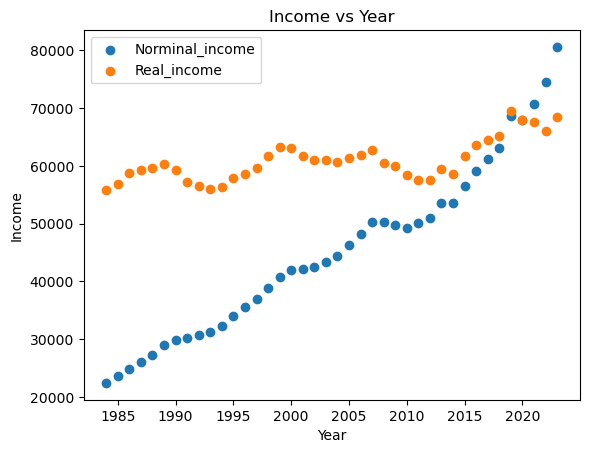

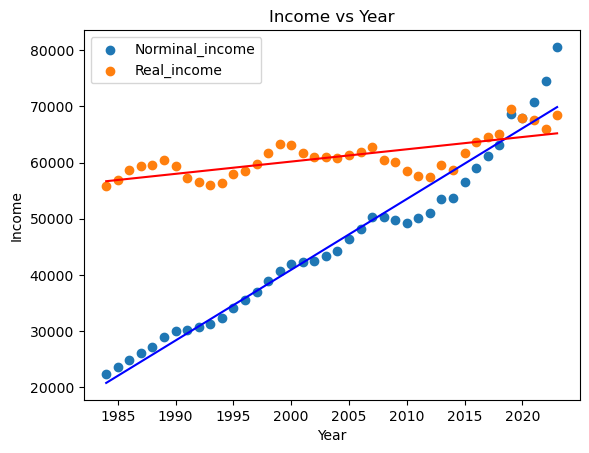

In [10]:
# scatter plot the real income and norminal income; the x-axis is the year, the y-axis is the income:
plt.scatter(df_merge['Year'], df_merge['Norminal_income'], label='Norminal_income')
plt.scatter(df_merge['Year'], df_merge['Real_income'], label='Real_income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income vs Year')
plt.legend()
plt.show()

# add the trend line:
loess_smoothed = lowess(df_merge['Real_income'], df_merge['Year'], frac=0.1)
# norminal income
z = np.polyfit(df_merge['Year'], df_merge['Norminal_income'], 1)
p = np.poly1d(z)
plt.plot(df_merge['Year'], p(df_merge['Year']), 'blue')
# real income
z_real = np.polyfit(df_merge['Year'], df_merge['Real_income'], 1)
p_real = np.poly1d(z_real)
plt.plot(df_merge['Year'], p_real(df_merge['Year']), 'red')
plt.scatter(df_merge['Year'], df_merge['Norminal_income'], label='Norminal_income')
plt.scatter(df_merge['Year'], df_merge['Real_income'], label='Real_income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income vs Year')
plt.legend()
plt.show()


In [ ]:
# perform the polynomial fit:

# norminal income
z = np.polyfit(df_merge['Year'], df_merge['Norminal_income'], 1)

# extract the slope and intercept:
slope = z[0]
intercept = z[1]

print(f'Slope: {slope}, Intercept: {intercept}')

# real income
z_real = np.polyfit(df_merge['Year'], df_merge['Real_income'], 1)

# extract the slope and intercept:
slope_real = z_real[0]
intercept_real = z_real[1]

print(f'Slope: {slope_real}, Intercept: {intercept_real}')

Slope: 1260.163227016887, Intercept: -2479417.0253283335
Slope: 218.74084917272094, Intercept: -377296.8740645786
